# 1. COAL

## 1.1 Coal: Introduction

Import packages

In [1]:
import numpy as np                                     # Basis for scientific computing in Python
import pandas as pd                                    # Crucial for data processing and analysis
import matplotlib.pyplot as plt                        # For visualization of data

%matplotlib inline

## 1.2 Coal: Load Data

In [2]:
# Load coal dataset

# The first four (4) rows will be skipped since they confuse pandas when loading the dataset
coal = pd.read_csv(r"..\Datasets\coal.csv", skiprows=3)

coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            31 non-null     float64
 5   1961            31 non-null     float64
 6   1962            31 non-null     float64
 7   1963            31 non-null     float64
 8   1964            31 non-null     float64
 9   1965            32 non-null     float64
 10  1966            32 non-null     float64
 11  1967            32 non-null     float64
 12  1968            32 non-null     float64
 13  1969            32 non-null     float64
 14  1970            32 non-null     float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            156 non-null    flo

In the previous cell, it has been observed that the years 1960 through 1970 have negligibly small amount of data compared to the years 1971 to 2015. Additionally, there were no data collected since 2016. Hence, these columns will be deleted from the dataframe.

In [3]:
# Delete columns with at least 33 null values
coal.dropna(thresh=33, axis=1, inplace=True)

The second and third rows in the coal dataframe will not be used during data analysis, hence, they will be dropped.

In [4]:
# Delete columns "Indicator Name" and "Indicator Code" from the dataframe
coal.drop(["Indicator Name", "Indicator Code", "Country Code"], axis=1, inplace=True)

coal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   1971          155 non-null    float64
 2   1972          155 non-null    float64
 3   1973          156 non-null    float64
 4   1974          156 non-null    float64
 5   1975          156 non-null    float64
 6   1976          156 non-null    float64
 7   1977          156 non-null    float64
 8   1978          156 non-null    float64
 9   1979          156 non-null    float64
 10  1980          156 non-null    float64
 11  1981          157 non-null    float64
 12  1982          157 non-null    float64
 13  1983          157 non-null    float64
 14  1984          157 non-null    float64
 15  1985          158 non-null    float64
 16  1986          158 non-null    float64
 17  1987          158 non-null    float64
 18  1988          158 non-null    

In the previous cell, it has been shown that the coal dataframe has 266 observations (i.e.,rows) and 46 columns.

In [5]:
# Check for any duplicate observations (i.e., rows)
num_duplicates = coal.duplicated("Country Name").sum()

print(f"There are {num_duplicates} duplicated rows.")

There are 0 duplicated rows.


In [6]:
coal.sort_values(by="Country Name", inplace=True)

In [7]:
coal.fillna(value=0, inplace=True)

In [8]:
coal.head()

,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2,Afghanistan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Africa Eastern and Southern,75.870771,72.115455,72.874444,70.129461,70.477232,69.666730,68.354139,69.787167,70.367245,...,70.069933,69.884938,69.087237,67.455296,67.284425,66.506292,66.159005,64.468711,62.302325,61.204323
3,Africa Western and Central,0.000000,0.010587,0.000000,0.481303,0.411631,0.402882,0.366329,0.000000,0.000000,...,0.307259,0.286817,0.324389,0.355609,0.323383,0.388457,0.367485,0.327521,0.326377,0.287308
5,Albania,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60,Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# Remove observations that include zones (such as SubSaharan Africa, Central Europe and Asia, etc.) instead of a country
remove_indices = {1, 2, 9, 42, 62, 63, 64, 65, 75, 76, 77, 78, 82, 100, 101, 105, 106, 107, 108, 109, 131, 132, 133, 134, 136, 143, 144, 145, 159, 160, 161, 162, 183, 184, 186, 187, 197, 198, 216, 220, 221, 229, 230, 231, 254, 262}

# Now, the indices of sample data containing only countries is defined with the following indices:
keep_indices = list(set(range(len(coal))) - remove_indices)

In [10]:
coal_sample_data = coal.iloc[keep_indices]

coal_sample_data.head()

,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
coal_sample_data.replace(to_replace=0, value=np.nan, inplace=True)

coal_sample_data.head()

C:\Users\dk\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Country Name,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Set "Country Name" as indices, then remove all rows that contain null values in all columns
coal_sample_data.set_index("Country Name", inplace=True)

coal_sample_data = coal_sample_data.dropna(how="all")

In [13]:
# Display sample data that will be used for analysis of electricity production
coal_sample_data

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,3.085845,2.430254,2.366753,2.425760,2.215179,2.075060,1.650572,2.261171,1.806541,2.062661,...,1.865836,2.179398,1.592875,1.439480,2.405339,2.835861,2.920510,2.548929,2.217284,2.029567
Australia,71.032143,71.926668,74.883172,67.782998,68.822626,68.364488,72.429595,70.748537,69.806825,73.253250,...,79.621617,77.053573,75.834832,74.899938,71.327642,67.988279,68.554964,63.715393,61.164325,62.871617
Austria,13.119637,11.536733,10.315047,10.043407,8.009618,10.446690,6.657201,6.648619,5.913377,7.021635,...,14.048101,12.856803,10.771901,7.592436,9.868402,11.778970,9.087469,9.456235,7.970332,8.226608
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.934611,2.389937,3.214682,2.937300,1.892621,1.873032,1.927433,2.306099,1.969738,1.689516
Belgium,26.885700,25.555855,21.679183,26.135558,21.468470,22.502812,25.362180,26.565003,28.215008,29.362792,...,10.926163,9.515812,8.656066,6.855889,6.346381,6.119262,6.695581,6.278906,6.156471,6.108012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,44.788010,44.566257,46.164123,44.176495,44.295431,46.170854,46.113022,44.005073,47.667442,51.203426,...,49.772878,48.993909,49.104440,45.437732,45.797606,43.345764,38.479856,39.943141,39.650733,34.232734
Uzbekistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.086803,4.085802,4.085020,4.086086,4.085106,4.083969,4.085714,4.084871,4.084838,4.085196
Vietnam,73.304348,80.818182,82.127660,79.710145,79.406919,81.163341,82.723870,77.777778,72.222222,39.926946,...,23.331625,21.818290,20.059676,18.009017,20.747500,21.551426,21.136642,24.512611,23.245083,29.571446


In [14]:
coal_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, Argentina to Zimbabwe
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1971    49 non-null     float64
 1   1972    50 non-null     float64
 2   1973    49 non-null     float64
 3   1974    50 non-null     float64
 4   1975    50 non-null     float64
 5   1976    50 non-null     float64
 6   1977    51 non-null     float64
 7   1978    49 non-null     float64
 8   1979    49 non-null     float64
 9   1980    50 non-null     float64
 10  1981    52 non-null     float64
 11  1982    55 non-null     float64
 12  1983    56 non-null     float64
 13  1984    57 non-null     float64
 14  1985    60 non-null     float64
 15  1986    60 non-null     float64
 16  1987    60 non-null     float64
 17  1988    61 non-null     float64
 18  1989    61 non-null     float64
 19  1990    73 non-null     float64
 20  1991    74 non-null     float64
 21  1992    74 non-null     float64


## 1.3 Coal: Exploratory Data Analysis

**Note:** All figures that will be generated will be saved in a directory named "Images"

In [15]:
# Import os module
import os

os.makedirs("..\Images", exist_ok=True)

After cleaning the coal data, the sample data will be visualized in order to gain insight of electricity production from solid fossil fuels. It should be noted that column values in the *coal_sample_data* dataframe represent percentage contribution of coal sources to electricity generation in a particular country, in a given year.

### 1.3.1 Contribution of coal in electricity generation from 1971 to 2015

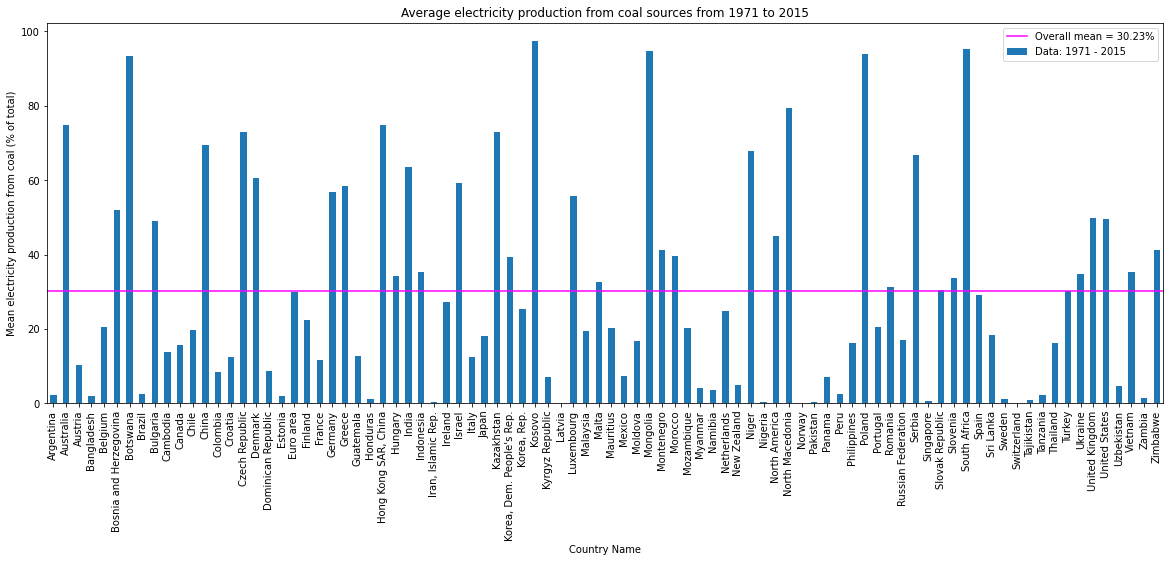

In [16]:
# Usage of coal for electricity production over the years for several countries in the World
coal_sample_data.mean(axis=1).plot(kind="bar", title="Average electricity production from coal sources from 1971 to 2015", ylabel="Mean electricity production from coal (% of total)", figsize=(20, 7), label="Data: 1971 - 2015")

# Indicate overall mean electricity production from 1971 to 2015
mean_elecProd_1971_2015 = coal_sample_data.mean(axis=1).mean()
plt.axhline(mean_elecProd_1971_2015, color="magenta", linewidth=1.5, label=f"Overall mean = {np.round(mean_elecProd_1971_2015, 2)}%")
plt.legend(loc="best")

# Save generated figure in a directory named "Images"
plt.savefig("..\Images\Average electricity production from coal sources from 1971 to 2015")

In [17]:
highest_coal_contrib = coal_sample_data.mean(axis=1).max()
print(f"The highest percentage contribution of coal for electricity production in the given time period was {np.round(highest_coal_contrib, 2)}% attained by Kosovo.")

The highest percentage contribution of coal for electricity production in the given time period was 97.44% attained by Kosovo.


In [18]:
lowest_coal_contrib = coal_sample_data.mean(axis=1).min()
print(f"The lowest percentage contribution of coal for electricity production in the given time period was {np.round(lowest_coal_contrib, 2)}% attained by Latvia.")

The lowest percentage contribution of coal for electricity production in the given time period was 0.03% attained by Latvia.


**INTERPRETATION:**

Over the given time period, it can be seen in the figure "Mean electricity production from coal sources from 1971 to 2015" that the highest consumption of thermal coals for electricity generation was attained by Kosovo. On the other hand, Latvia had the lowest dependent on thermal coals for electricity production.

As shown in the next cell, the top 5 countries that heavily relied on thermal coals for electricity production include Kosovo, South Africa, Mongolia, Poland, and Botswana, in descending order. Meanwhile, countries such as Pakistan, Islamic Republic of Iran, Switzerland, Norway, and Latvia recorded the lowest amounts of thermal coals for generating electricity  over the given time period.

In [19]:
mean_elecProd_ranked = coal_sample_data.iloc[:, :].mean(axis=1)

# Rank values on descending order
mean_elecProd_ranked.rank(method="max", ascending=False)
mean_elecProd_ranked.sort_values(ascending=False, inplace=True)
mean_elecProd_ranked

Country Name
Kosovo                97.438279
South Africa          95.188235
Mongolia              94.717312
Poland                93.860710
Botswana              93.477761
                        ...    
Pakistan               0.335913
Iran, Islamic Rep.     0.281835
Switzerland            0.085486
Norway                 0.064827
Latvia                 0.029476
Length: 88, dtype: float64

However, in order to avoid bias, it makes more sense to analyze and compare data on the same ground. This implies that the number of data points used to compute the country mean consumption of thermal coals should be more or less the same. Thus, data points (in the DataFrame *coal_sample_data*) from 2000 through 2015 will be used for analysis. 

### 1.3.2 Percentage consumption of thermal coal from 2000 to 2015

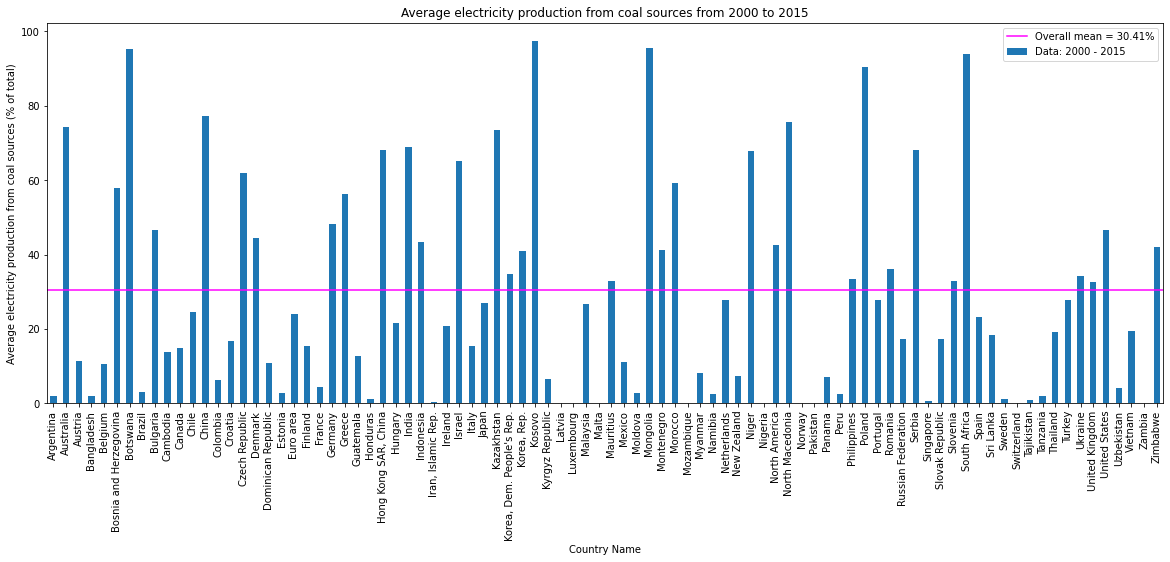

In [20]:
# Reset index values from "Country Names" to integers
mean_elecProd = coal_sample_data.reset_index()

# Compute average electricity production fromcoal sources from 2000 to 2015
mean_elecProd["Average"] = mean_elecProd.iloc[:, 29:].mean(axis=1)

mean_elecProd_2000_2015 = mean_elecProd[["Country Name", "Average"]]
mean_elecProd_2000_2015.plot(kind="bar", title="Average electricity production from coal sources from 2000 to 2015", x="Country Name", y="Average", ylabel="Average electricity production from coal sources (% of total)", figsize=(20, 7), rot=90, label="Data: 2000 - 2015")

# Indicate overall average percentage of thermal coal used for electricity production
mean_value_2000_2015 = mean_elecProd["Average"].mean().mean()

plt.axhline(mean_value_2000_2015, color="magenta", linewidth=1.5, label=f"Overall mean = {np.round(mean_value_2000_2015, 2)}%")
plt.legend(loc="best")

# Save the generated figure in "Images" directory
plt.savefig("..\Images\Average electricity production from coal sources from 2000 to 2015")

In [21]:
# Rank electricity production values in descending order
mean_elecProd_2000_2015["Rank"] = mean_elecProd_2000_2015["Average"].rank(method="max", ascending=False)

# Sort values based on the assigned ranks
mean_elecProd_2000_2015.sort_values(by="Rank", ascending=True, inplace=True)

mean_elecProd_2000_2015.dropna(axis=0, inplace= True)
mean_elecProd_2000_2015

C:\Users\dk\AppData\Local\Temp/ipykernel_6436/3561509123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_elecProd_2000_2015["Rank"] = mean_elecProd_2000_2015["Average"].rank(method="max", ascending=False)
C:\Users\dk\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Country Name,Average,Rank
38,Kosovo,97.438279,1.0
47,Mongolia,95.649725,2.0
6,Botswana,95.169829,3.0
72,South Africa,93.884183,4.0
64,Poland,90.402119,5.0
...,...,...,...
30,"Iran, Islamic Rep.",0.256154,79.0
60,Pakistan,0.204094,80.0
86,Zambia,0.183056,81.0
59,Norway,0.095515,82.0


According to the rank results displayed on a previous cell, Kosovo still holds the first place for the highest average percentage contribution of thermal coals in electricity production, followed by Mongolia, Botswana, South Arica, and Poland.
On the other hand, the following countries had the lowest contribution of thermal coals for electricity generation:
Iran, Pakistan, Zambia, Norway, and Latvia (lowest)